In [80]:
import pandas as pd
import seaborn as sb
data = sb.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [81]:
final=data[['survived','pclass','age','sibsp', 'fare']]
final.head()

,survived,pclass,age,sibsp,fare
0,0,3,22.0,1,7.2500
1,1,1,38.0,1,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,1,53.1000
4,0,3,35.0,0,8.0500


In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(final)
pd.DataFrame(sc.fit_transform(final), columns=final.columns).describe().round(2)

,survived,pclass,age,sibsp,fare
count,891.00,891.00,891.00,891.00,891.00
mean,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-0.79,-1.57,-2.25,-0.47,-0.65
25%,-0.79,-0.37,-0.59,-0.47,-0.49
50%,-0.79,0.83,0.00,-0.47,-0.36
75%,1.27,0.83,0.41,0.43,-0.02
max,1.27,0.83,3.87,6.78,9.67


In [85]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit_transform(final)
pd.DataFrame(mms.fit_transform(final), columns=final.columns).describe().round(2)

,survived,pclass,age,sibsp,fare
count,891.00,891.00,714.00,891.00,891.00
mean,0.38,0.65,0.37,0.07,0.06
std,0.49,0.42,0.18,0.14,0.10
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.50,0.25,0.00,0.02
50%,0.00,1.00,0.35,0.00,0.03
75%,1.00,1.00,0.47,0.12,0.06
max,1.00,1.00,1.00,1.00,1.00


In [86]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit_transform(final)
pd.DataFrame(rs.fit_transform(final), columns=final.columns).describe().round(2)

,survived,pclass,age,sibsp,fare
count,891.00,891.00,714.00,891.00,891.00
mean,0.38,-0.69,0.10,0.52,0.77
std,0.49,0.84,0.81,1.10,2.15
min,0.00,-2.00,-1.54,0.00,-0.63
25%,0.00,-1.00,-0.44,0.00,-0.28
50%,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,0.56,1.00,0.72
max,1.00,0.00,2.91,8.00,21.56


In [88]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer
import pandas as pd

imputer = SimpleImputer(strategy='mean')
final_imputed = imputer.fit_transform(final)

nm = Normalizer()
normalized_data = nm.fit_transform(final_imputed)

normalized_df = pd.DataFrame(normalized_data, columns=final.columns)
description = normalized_df.describe().round(2)

print(description)

       survived  pclass     age   sibsp    fare
count    891.00  891.00  891.00  891.00  891.00
mean       0.01    0.07    0.74    0.01    0.53
std        0.02    0.05    0.28    0.03    0.28
min        0.00    0.00    0.01    0.00    0.00
25%        0.00    0.03    0.58    0.00    0.28
50%        0.00    0.07    0.88    0.00    0.46
75%        0.02    0.10    0.95    0.01    0.81
max        0.11    0.33    1.00    0.21    1.00


In [95]:
dfi=pd.read_csv('/Users/hopper/Downloads/insurance_data.csv')
dfi

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


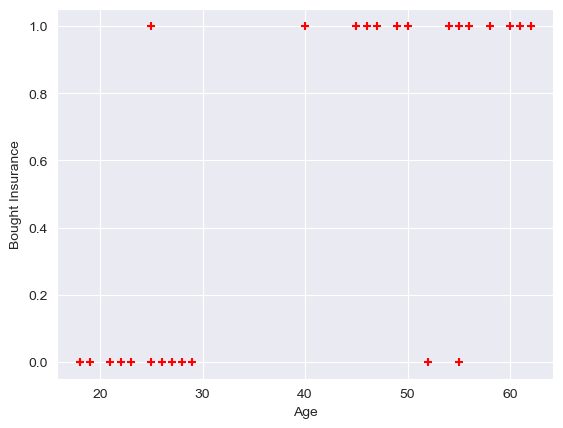

In [104]:
import matplotlib.pyplot as plt

plt.scatter(dfi.age, dfi.bought_insurance, marker='+', color='red')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.show()

In [137]:
x=dfi[['age']]
y=dfi.bought_insurance

In [138]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [139]:
model.predict([[40]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.52641316])

In [140]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.8)


In [141]:
xtrain

,age
11,28
20,21
25,54
5,56
18,19
2,47
9,61
12,27
21,26
17,58


In [146]:
model.predict(xtest)

array([0.00536652, 0.76325255, 0.17115409, 0.66851679, 0.81062042,
       0.12378621])

In [147]:
ytest

19    0
24    1
1     0
4     1
3     0
26    0
Name: bought_insurance, dtype: int64